In [1]:
import numpy as np
import tcbench as tcb
from functions import (build_faiss_index, 
                       search_and_compare_labels, 
                       extract_results,
                       extract_results_splits, 
                       plot_results,
                       plot_results_splits)

In [2]:
vectors_baseline = np.load('artifacts-mirage19/baseline_vectors.npy')
labels_baseline = np.load('artifacts-mirage19/baseline_labels.npy')
vectors_embeddings = np.load('artifacts-mirage19/embeddings_vectors.npy')
labels_embeddings = np.load('artifacts-mirage19/embeddings_labels.npy')

In [3]:
df_split = tcb.load_parquet(tcb.DATASETS.MIRAGE19, min_pkts=10, split=True)
train_val_indices = np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]])
test_indices = df_split.iloc[0][2]

In [4]:
index_baseline, selected_indices_baseline = build_faiss_index(vectors_baseline, labels_baseline, train_val_indices, 'euclidean')
coverage_percentage_baseline, match_percentage_baseline, _ = search_and_compare_labels(vectors_baseline, labels_baseline, test_indices, selected_indices_baseline, index_baseline, "distance")
print("Baseline - Coverage (%):", coverage_percentage_baseline)
print("Baseline - Match (%):", match_percentage_baseline)

Baseline - Coverage (%): 100.0
Baseline - Match (%): 64.08538485509504


In [5]:
index_embeddings, selected_indices_embeddings = build_faiss_index(vectors_embeddings, labels_embeddings, train_val_indices, 'euclidean')
coverage_percentage_embeddings, match_percentage_embeddings, _ = search_and_compare_labels(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings, index_embeddings, "distance")
print("Embeddings - Coverage (%):", coverage_percentage_embeddings)  
print("Embeddings - Match (%):", match_percentage_embeddings)

Embeddings - Coverage (%): 100.0
Embeddings - Match (%): 79.38610158928014


In [6]:
index_embeddings_cosine, selected_indices_embeddings_cosine = build_faiss_index(vectors_embeddings, labels_embeddings, train_val_indices, 'cosine')
coverage_percentage_embeddings_cosine, match_percentage_embeddings_cosine, _ = search_and_compare_labels(vectors_embeddings, labels_embeddings, test_indices, selected_indices_embeddings_cosine, index_embeddings_cosine, "similarity")
print("Embeddings Cosine - Coverage (%):", coverage_percentage_embeddings_cosine)    
print("Embeddings Cosine - Match (%):", match_percentage_embeddings_cosine)

Embeddings Cosine - Coverage (%): 100.0
Embeddings Cosine - Match (%): 80.91305702711125


In [7]:
samples = [10, 100, 1000]

distances_baseline = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
distances_embeddings = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
similarities = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
                0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

BASELINE plots using EUCLIDEAN DISTANCE
The X-axis is the distance
There are two Y-axes: the left one is the accuracy and the right one is the coverage percentage
These have been graphed across 8 sample sizes (i.e. the number of samples per class in the database)

SOME NOTES
With 100% classifed and no distance we had 63.9% accuracy
We can see that as the number deteriorates with larger distances
Higher accuracy however comes at the expense of a lower coverage percentage

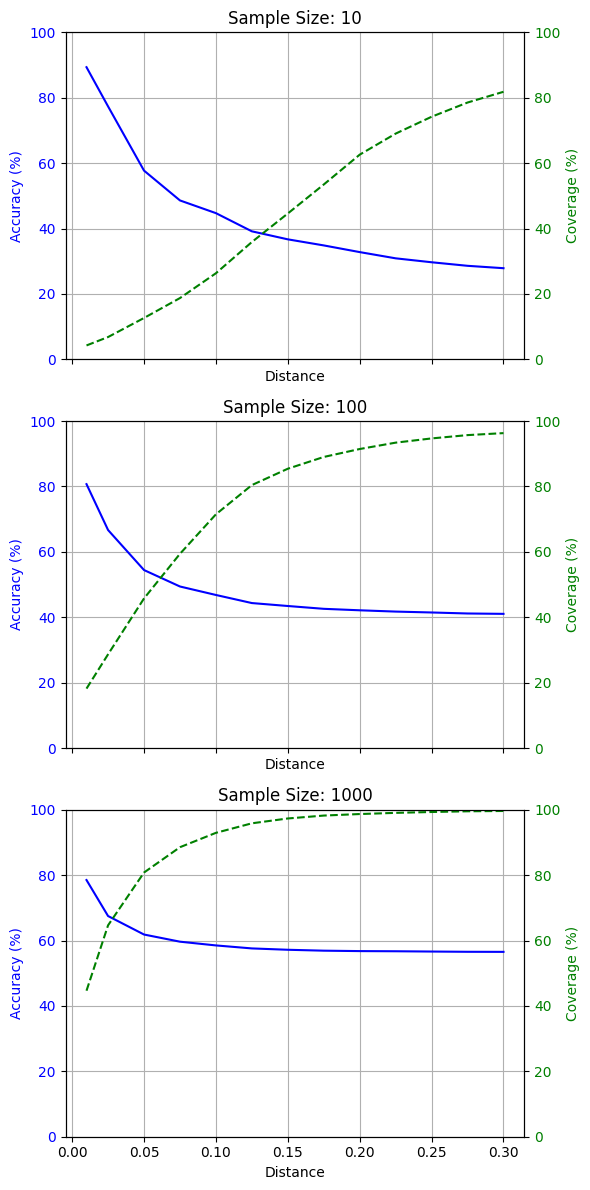

In [8]:
coverage_results_baseline, accuracy_results_baseline, _ = extract_results(vectors_baseline, labels_baseline, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_baseline)
plot_results(coverage_results_baseline, accuracy_results_baseline, samples, distances_baseline)

EMBEDDINGS plots using EUCLIDEAN DISTANCE
The X-axis is the distance
There are two Y-axes: the left one is the accuracy and the right one is the coverage percentage
These have been graphed across 8 sample sizes (i.e. the number of samples per class in the database)

SOME NOTES
With 100% classifed and no distance we had 79.4% accuracy
We can again see that as the number deteriorates with larger distances
But the line is not as straight
There definitely seems to be points where the accuracy is well above 80%.
The coverage percentage is still quite low though, usually <50%.

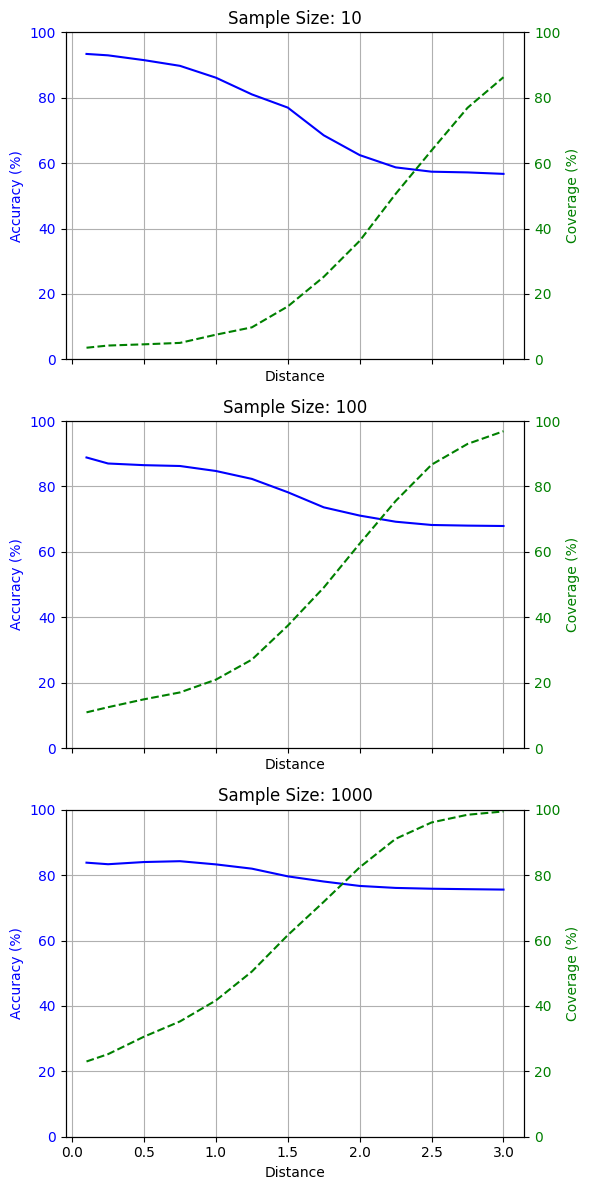

In [9]:
coverage_results_embeddings, accuracy_results_embeddings, _ = extract_results(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'euclidean', 'distance', samples, distances_embeddings)
plot_results(coverage_results_embeddings, accuracy_results_embeddings, samples, distances_embeddings)

EMBEDDINGS plots using COSINE SIMILARITY
The X-axis is the distance
There are two Y-axes: the left one is the accuracy and the right one is the coverage percentage
These have been graphed across 8 sample sizes (i.e. the number of samples per class in the database)

SOME NOTES
With 100% classifed and no distance we had 80.9% accuracy
Similar to the embeddings euclidean distance there seem to be distances at which the accuracy nears 90%.
I think there are higher coverage percentages in this one though: 
    e.g. sample size 100, has accuracy above 80% but coverage percentage of nearly 60%.
Still not ideal.

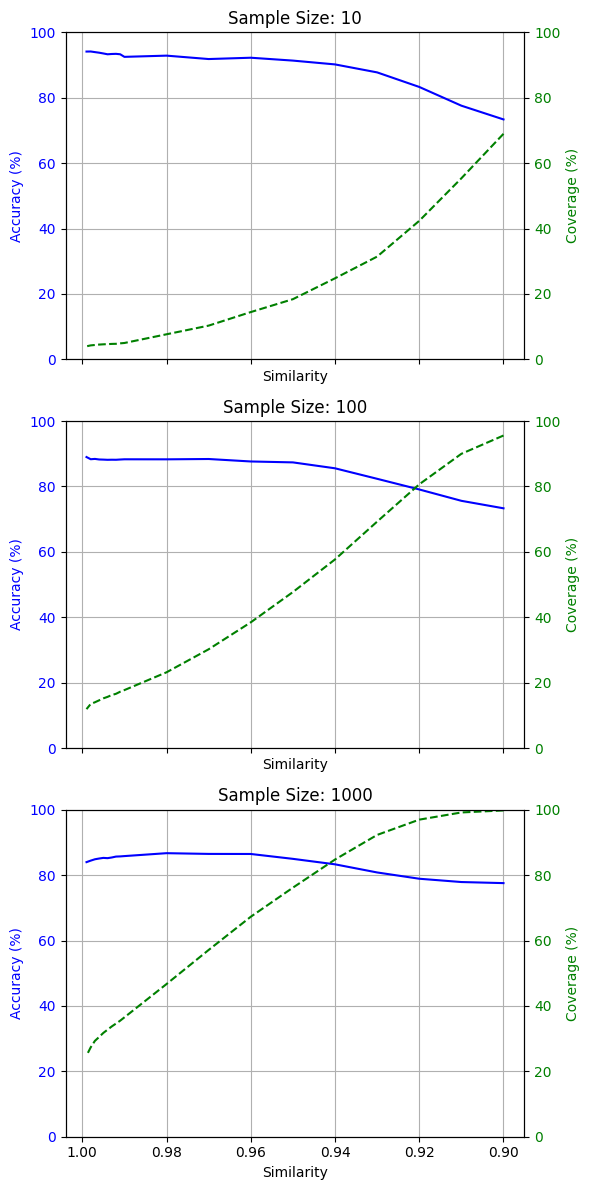

In [10]:
coverage_results_embeddings_cosine, accuracy_results_embeddings_cosine, _ = extract_results(vectors_embeddings, labels_embeddings, train_val_indices, test_indices, 'cosine', 'similarity', samples, similarities)
plot_results(coverage_results_embeddings_cosine, accuracy_results_embeddings_cosine, samples, similarities, reverse=True)

SAME EXPERIMENTS but run 50 times each (5 different splits with 10 random seeds per split)

In [11]:
train_test_splits = [
    (np.concatenate([df_split.iloc[0][0], df_split.iloc[0][1]]), df_split.iloc[0][2]),
    (np.concatenate([df_split.iloc[1][0], df_split.iloc[1][1]]), df_split.iloc[1][2]),
    (np.concatenate([df_split.iloc[2][0], df_split.iloc[2][1]]), df_split.iloc[2][2]),
    (np.concatenate([df_split.iloc[3][0], df_split.iloc[3][1]]), df_split.iloc[3][2]),
    (np.concatenate([df_split.iloc[4][0], df_split.iloc[4][1]]), df_split.iloc[4][2])
]

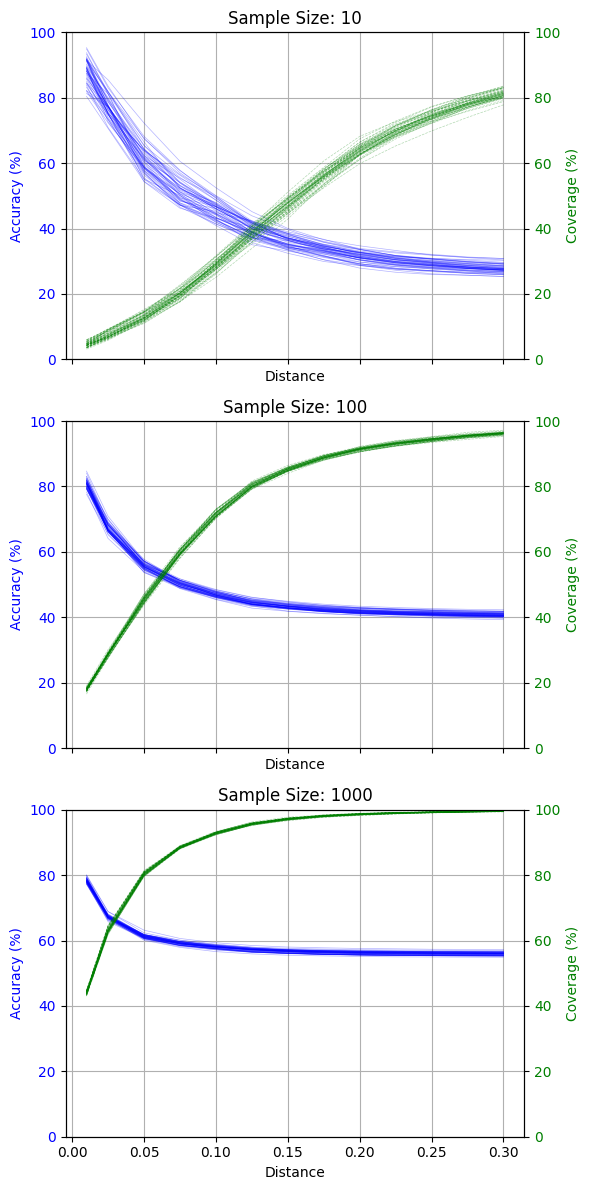

In [12]:
coverage_results_baseline_splits, accuracy_results_baseline_splits = extract_results_splits(vectors_baseline, labels_baseline, train_test_splits, 'euclidean', 'distance', samples, distances_baseline)
plot_results_splits(coverage_results_baseline_splits, accuracy_results_baseline_splits, samples, distances_baseline)

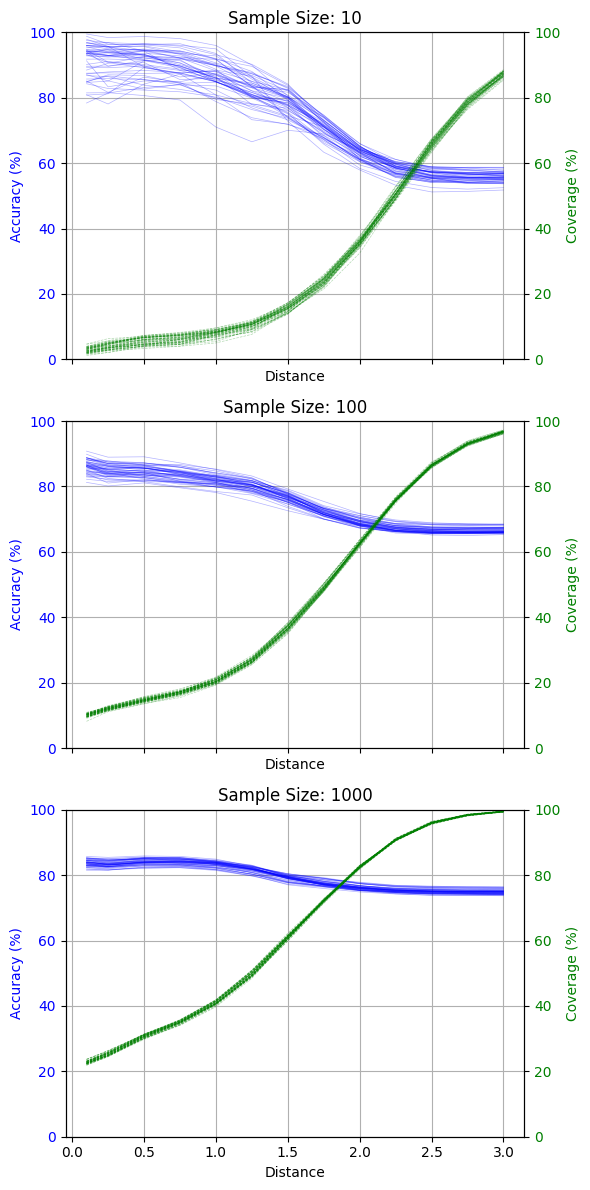

In [13]:
coverage_results_embeddings_splits, accuracy_results_embeddings_splits = extract_results_splits(vectors_embeddings, labels_embeddings, train_test_splits, 'euclidean', 'distance', samples, distances_embeddings)
plot_results_splits(coverage_results_embeddings_splits, accuracy_results_embeddings_splits, samples, distances_embeddings)

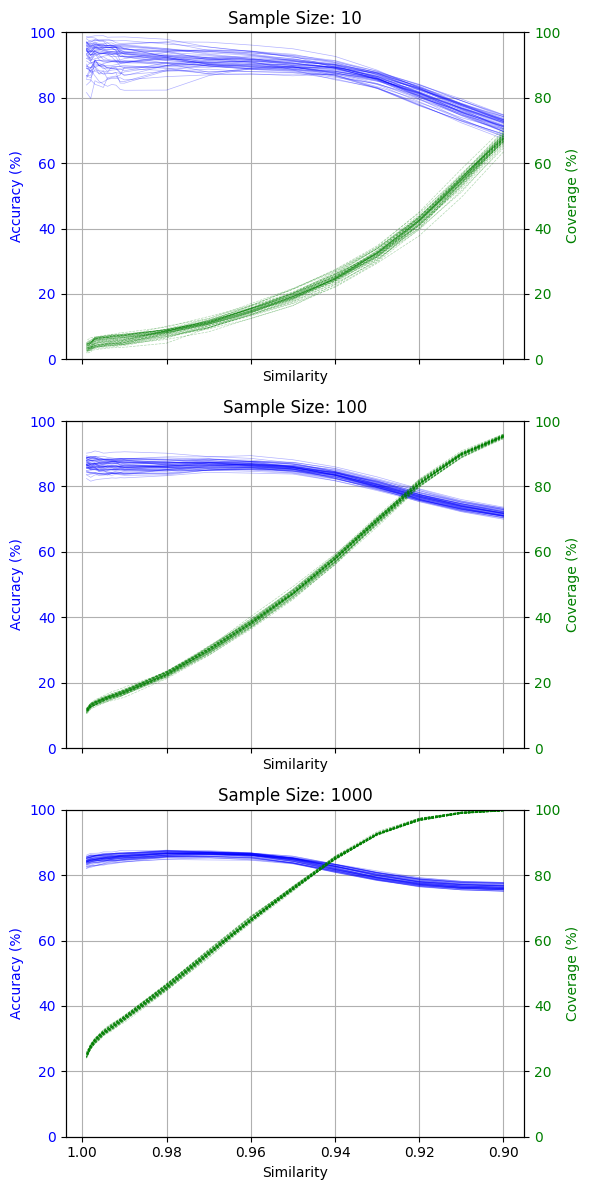

In [14]:
coverage_results_embeddings_cosine_splits, accuracy_results_embeddings_cosine_splits = extract_results_splits(vectors_embeddings, labels_embeddings, train_test_splits, 'cosine', 'similarity', samples, similarities)
plot_results_splits(coverage_results_embeddings_cosine_splits, accuracy_results_embeddings_cosine_splits, samples, similarities, reverse=True)